In [1]:
#### Versión del 28/1/2023 ##### 
import pytearcat as pt
import sympy as sy
from sympy import * 

### Metric


In [2]:
t,r,theta,phi = pt.coords('t,r,theta,phi')

A = pt.fun('A','r')
B = pt.fun('B','r')
C = pt.fun('C','r')
#C=r
ρ = pt.fun('ρ','r')
P = pt.fun('P','r')
#Pt = pt.fun('Pt','r')
Π = pt.fun('Π','r')
#Delta=P-Pt
F=0
E= pt.fun('E','r')


Remember that the time coordinate must be the first coordinate.


In [3]:
ds = 'ds2 = -A**2*dt**2 + B**2*dr**2 + C**2 * (dtheta**2 + sin(theta)**2 * dphi**2)'
g = pt.metric(ds)


Dimension = 4
Coordinates = t,r,theta,phi
Metric defined successfully: 



<IPython.core.display.Math object>

Matrix([
[-A(r)**2,       0,       0,                     0],
[       0, B(r)**2,       0,                     0],
[       0,       0, C(r)**2,                     0],
[       0,       0,       0, C(r)**2*sin(theta)**2]])

### The tetrad: the kinematical variables

Let us choose an orthogonal unitary tetrad:
$$
e^{(0)}_\alpha~=V_\alpha, \quad 
e^{(1)}_\alpha~=K_\alpha, \quad 
e^{(2)}_\alpha~=L_\alpha \quad \mathrm{and}  \quad e^{(3)}_\alpha~=~S_\alpha.
$$


In [4]:
Vu = pt.ten('Vu',1)
Vu.assign([1/A,0,0,0],'^')
Ku = pt.ten('Ku',1)
Ku.assign([0,1/B,0,0],'^')
Lu = pt.ten('Lu',1)
Lu.assign([0,0,1/C,0],'^')
Su = pt.ten('Su',1)
Su.assign([0,0,0,1/(C*sy.sin(theta))],'^')

Elements assigned correctly to the ^ components
Elements assigned correctly to the ^ components
Elements assigned correctly to the ^ components
Elements assigned correctly to the ^ components


In [5]:
Vd = pt.ten('Vd',1)
Vd.assign(Vu("^a")*g("_a,_b"),"_b")
#Vd.display('_')

Kd = pt.ten('Kd',1)
Kd.assign(Ku("^a")*g("_a,_b"),"_b")
Kd.simplify()
#Kd.display('_')

Ld = pt.ten('Ld',1)
Ld.assign(Lu("^a")*g("_a,_b"),"_b")
Ld.simplify()
#Ld.display('_')

Sd = pt.ten('Sd',1)
Sd.assign(Su("^a")*g("_a,_b"),"_b")
Sd.simplify()
#Sd.display('_')

Elements assigned correctly to the _b components
Elements assigned correctly to the _b components
Elements assigned correctly to the _b components
Elements assigned correctly to the _b components


### Tensores calculados directamente de la métrica

$$
h_{\mu\nu}=g_{\mu\nu} +V_\mu V_\nu = K_\mu K_\nu+L_\mu L_\nu+S_\mu S_\nu
$$

Elements assigned correctly to the _a,_b components


hdd Tensor $hdd{^\alpha}{_\beta}$:   0%|          | 0/16 [00:00<?, ?it/s]

hdd Tensor $hdd{^\alpha}{^\beta}$:   0%|          | 0/16 [00:00<?, ?it/s]

hdd Tensor $hdd{_\alpha}{^\beta}$:   0%|          | 0/16 [00:00<?, ?it/s]

<IPython.core.display.Latex object>

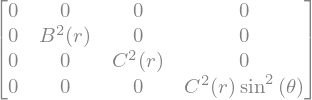

In [6]:
hdd=pt.ten('hdd',2)
#hdd.assign(g("_a,_b")+Vd('_a')*Vd('_b') ,"_a,_b")
hdd.assign(Kd('_a')*Kd('_b')+Ld('_a')*Ld('_b')+Sd('_a')*Sd('_b'),'_a,_b' )
hdd.simplify()
hdd.complete('_,_')
hdd.display('_,_')

In [7]:
Chr= pt.christoffel()

<IPython.core.display.Latex object>

  0%|          | 0/64 [00:00<?, ?it/s]

In [8]:
# Tensor de Riemann
R = pt.riemann(All=True)
R.simplify

<IPython.core.display.Latex object>

  0%|          | 0/256 [00:00<?, ?it/s]

Riemann Tensor $R{_\alpha}{_\beta}{_\gamma}{_\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

Riemann Tensor $R{^\alpha}{^\beta}{_\gamma}{_\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

Riemann Tensor $R{^\alpha}{^\beta}{^\gamma}{_\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

Riemann Tensor $R{^\alpha}{^\beta}{^\gamma}{^\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

Riemann Tensor $R{^\alpha}{^\beta}{_\gamma}{^\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

Riemann Tensor $R{^\alpha}{_\beta}{^\gamma}{_\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

Riemann Tensor $R{^\alpha}{_\beta}{^\gamma}{^\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

Riemann Tensor $R{^\alpha}{_\beta}{_\gamma}{^\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

Riemann Tensor $R{_\alpha}{^\beta}{_\gamma}{_\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

Riemann Tensor $R{_\alpha}{^\beta}{^\gamma}{_\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

Riemann Tensor $R{_\alpha}{^\beta}{^\gamma}{^\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

Riemann Tensor $R{_\alpha}{^\beta}{_\gamma}{^\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

Riemann Tensor $R{_\alpha}{_\beta}{^\gamma}{_\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

Riemann Tensor $R{_\alpha}{_\beta}{^\gamma}{^\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

Riemann Tensor $R{_\alpha}{_\beta}{_\gamma}{^\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

<IPython.core.display.Latex object>

<bound method Tensor.simplify of Riemann tensor defined>

In [9]:
# Tensor de Ricci
Ric = pt.ricci(All=True)

<IPython.core.display.Latex object>

  0%|          | 0/16 [00:00<?, ?it/s]

Ricci Tensor $R{^\alpha}{_\beta}$:   0%|          | 0/16 [00:00<?, ?it/s]

Ricci Tensor $R{^\alpha}{^\beta}$:   0%|          | 0/16 [00:00<?, ?it/s]

Ricci Tensor $R{_\alpha}{^\beta}$:   0%|          | 0/16 [00:00<?, ?it/s]

<IPython.core.display.Latex object>

  0%|          | 0/16 [00:00<?, ?it/s]

<IPython.core.display.Latex object>

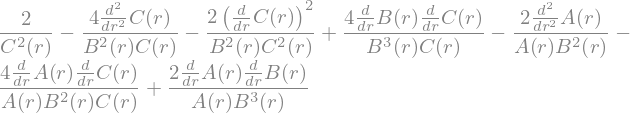

In [10]:
# Escalar de Ricci
RicS = pt.riccis()
RicS.simplify()

$$
C_{a b c d}=  R_{a b c d} - g_{a[c} R_{d] b} + g_{b[c} R_{d] a}  + \frac{1}{3} R g_{a[c} g_{d] b}
$$

In [11]:
Wy= pt.ten('Wy',4)
Wy.assign( R('_a,_b,_c,_d') - (g('_a,_c')*Ric('_d,_b') - g('_a,_d')*Ric('_c,_b'))/2 + \
                              (g('_b,_c')*Ric('_d,_a') - g('_b,_d')*Ric('_c,_a'))/2 + \
            (RicS*(g('_a,_c')*g('_d,_b')- g('_a,_d')*g('_c,_b')))/3 , '_a,_b,_c,_d') 
Wy.simplify()
Wy.complete('_,_,_,_')
#Wy.display('^a,_b,_a,_d')

Elements assigned correctly to the _a,_b,_c,_d components


Wy Tensor $Wy{^\alpha}{_\beta}{_\gamma}{_\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

Wy Tensor $Wy{^\alpha}{^\beta}{_\gamma}{_\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

Wy Tensor $Wy{^\alpha}{^\beta}{^\gamma}{_\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

Wy Tensor $Wy{^\alpha}{^\beta}{^\gamma}{^\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

Wy Tensor $Wy{^\alpha}{^\beta}{_\gamma}{^\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

Wy Tensor $Wy{^\alpha}{_\beta}{^\gamma}{_\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

Wy Tensor $Wy{^\alpha}{_\beta}{^\gamma}{^\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

Wy Tensor $Wy{^\alpha}{_\beta}{_\gamma}{^\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

Wy Tensor $Wy{_\alpha}{^\beta}{_\gamma}{_\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

Wy Tensor $Wy{_\alpha}{^\beta}{^\gamma}{_\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

Wy Tensor $Wy{_\alpha}{^\beta}{^\gamma}{^\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

Wy Tensor $Wy{_\alpha}{^\beta}{_\gamma}{^\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

Wy Tensor $Wy{_\alpha}{_\beta}{^\gamma}{_\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

Wy Tensor $Wy{_\alpha}{_\beta}{^\gamma}{^\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

Wy Tensor $Wy{_\alpha}{_\beta}{_\gamma}{^\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

<IPython.core.display.Latex object>

The first set equations can be considered purely geometrical and emerges from the projection of the Riemann tensor along the tetrad i.e.
$$
2 V_{\alpha ;[\beta ; \gamma]}=R_{\delta \alpha \beta \gamma} V^{\delta}, \quad 2 K_{\alpha ;[\beta ; \gamma]}=R_{\delta \alpha \beta \gamma} K^{\delta}, \quad 2 L_{\alpha ;[\beta ; \gamma]}=R_{\delta \alpha \beta \gamma} L^{\delta} \quad \text { and } \quad 2 S_{\alpha ;[\beta ; \gamma]}=R_{\delta \alpha \beta \gamma} S^{\delta}
$$

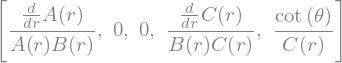

In [12]:
a1= A.diff(r)/(A*B)

σ1 = B.diff(t)/(A*B)
σ2= C.diff(t)/(A*C)

J1=C.diff(r)/(C*B)
J2=sy.cot(theta)/C
[a1,σ1,σ2,J1,J2]

### COVARIANT DERIVATIVE OF $V_{\alpha}$
$$
V_{\alpha ; \beta}
$$


Elements assigned correctly to the _a,_b components


DcVd Tensor $DcVd{^\alpha}{_\beta}$:   0%|          | 0/16 [00:00<?, ?it/s]

DcVd Tensor $DcVd{^\alpha}{^\beta}$:   0%|          | 0/16 [00:00<?, ?it/s]

DcVd Tensor $DcVd{_\alpha}{^\beta}$:   0%|          | 0/16 [00:00<?, ?it/s]

<IPython.core.display.Latex object>

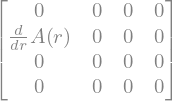

In [13]:
DcVd = pt.ten('DcVd',2)
DcVd.assign(-a1*Kd('_a')*Vd('_b')+ σ1*Kd('_a')*Kd('_b')+ σ2*(Ld('_a')*Ld('_b')+Sd('_a')*Sd('_b')) ,"_a,_b")
DcVd.complete('_,_')
DcVd.display('_,_')

$$
a_{\alpha}=V^{\beta} V_{\alpha ; \beta}\,, \quad a_{\alpha;\beta}
$$

Elements assigned correctly to the _a components


ad Tensor $ad{^\alpha}$:   0%|          | 0/4 [00:00<?, ?it/s]

<IPython.core.display.Latex object>

Elements assigned correctly to the _a,_b components


Dcad Tensor $Dcad{^\alpha}{_\beta}$:   0%|          | 0/16 [00:00<?, ?it/s]

Dcad Tensor $Dcad{^\alpha}{^\beta}$:   0%|          | 0/16 [00:00<?, ?it/s]

Dcad Tensor $Dcad{_\alpha}{^\beta}$:   0%|          | 0/16 [00:00<?, ?it/s]

<IPython.core.display.Latex object>

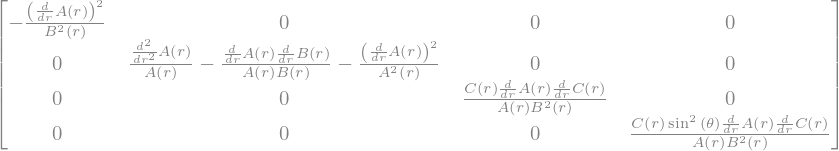

In [14]:
# Aceleracion y su derivada covariante
ad= pt.ten("ad",1)
ad.assign( DcVd("_a,_b")*Vu("^b") ,"_a")
ad.complete('_')
ad.simplify()

Dcad = pt.ten("Dcad",2)
Dcad_dat = pt.C(ad("_a"),"_b") 
Dcad.assign(Dcad_dat,"_a,_b")
Dcad.complete('_,_')
Dcad.simplify()
Dcad.display()

Elements assigned correctly to the ^a,_b components


Dcau Tensor $Dcau{_\alpha}{_\beta}$:   0%|          | 0/16 [00:00<?, ?it/s]

Dcau Tensor $Dcau{^\alpha}{^\beta}$:   0%|          | 0/16 [00:00<?, ?it/s]

Dcau Tensor $Dcau{_\alpha}{^\beta}$:   0%|          | 0/16 [00:00<?, ?it/s]

<IPython.core.display.Latex object>

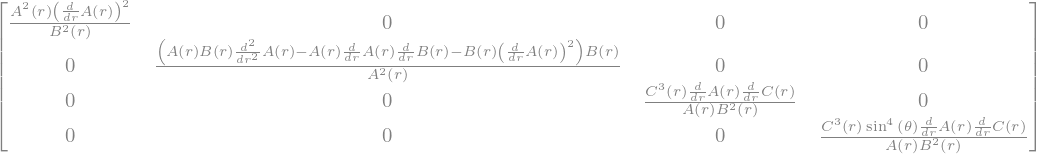

In [15]:
Dcau = pt.ten('Dcau',2)
Dcau_dat = pt.C(ad('^a'),'_b') 
Dcau.assign(Dcad_dat,'^a,_b')
Dcau.complete('^,_')
Dcau.simplify()
Dcau.display()

$$
\Theta=V_{; \alpha}^{\alpha}
$$

In [16]:
#Expansión
Θ =DcVd('^a,_a')
display(Θ)

In [17]:
#Shear
σ= 1/A*(B.diff(t)/(B)-C.diff(t)/(C)  )
display(σ)

### COVARIANT DERIVATIVE OF: 
$$
K_{\alpha ; \beta}\,, \quad L_{\alpha ; \beta} \,, \quad S{\alpha ; \beta}
$$

In [18]:
DcKd = pt.ten('DcKd',2)
DcKd.assign(-a1*Vd('_a')*Vd('_b')+ σ1*Vd('_a')*Kd('_b')+ J1*(Ld('_a')*Ld('_b')+Sd('_a')*Sd('_b')) ,"_a,_b")
DcKd.simplify()
#DcKdS.display('_,_')

DcLd = pt.ten('DcLd',2)
DcLd.assign(σ2*Vd('_a')*Ld('_b')- J1*Kd('_a')*Ld('_b')+ J2*Sd('_a')*Sd('_b') ,"_a,_b")
DcLd.simplify()
#DcLdS.display('_,_')

DcSd = pt.ten('DcSd',2)
DcSd.assign(σ2*Vd('_a')*Sd('_b')- J1*Kd('_a')*Sd('_b')- J2*Ld('_a')*Sd('_b') ,"_a,_b")
DcSd.simplify()
#DcSdS.display('_,_')


Elements assigned correctly to the _a,_b components
Elements assigned correctly to the _a,_b components
Elements assigned correctly to the _a,_b components


### The directional derivatives operators
$$
f^{\bullet}=V^{\alpha} \partial_{\alpha} f \quad f^{\dagger}=K^{\alpha} \partial_{\alpha} f \quad \text { and } \quad f^{*}=L^{\alpha} \partial_{\alpha} f
$$

Elements assigned correctly to the _a components
Elements assigned correctly to the _a components
Elements assigned correctly to the _a components


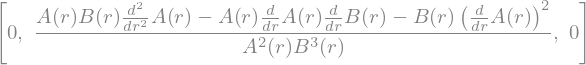

In [19]:
# Derivadas de a1
Da1c= pt.ten('Da1c',1)
Da1c.assign(pt.D(a1,"_a"), "_a")
Da1c.simplify()
Da1cir= Vu('^a')*Da1c('_a') 
Da1cir.simplify()

Da1= pt.ten('Da1',1)
Da1.assign(pt.D(a1,"_a"), "_a")
Da1.simplify()
Da1dag= Ku('^a')*Da1('_a') 
Da1dag.factor()

Da1es= pt.ten('Da1est',1)
Da1es.assign(pt.D(a1,"_a"), "_a")
Da1es.simplify()
Da1est= Lu('^a')*Da1es('_a') 
Da1est.simplify()

[Da1cir, Da1dag, Da1est]

## The energy momentum tensor
$$
{T}_{\alpha\beta}= (\rho+P) V_\alpha V_\beta+P g _{\alpha \beta} +\Pi_{\alpha \beta}+\mathcal{F}_\alpha V_\beta+\mathcal{F}_\beta V_\alpha .
$$

$$
\mathcal{F}_{\mu}=\mathcal{F} K_{\mu}
$$

In [20]:
Fd=pt.ten('Fd',1)
Fd.assign(F*Kd('_a') ,"_a")
Fd.simplify()
Fd.display('_')
Fd.complete('_')

Elements assigned correctly to the _a components


Fd Tensor $Fd{^\alpha}$:   0%|          | 0/4 [00:00<?, ?it/s]

<IPython.core.display.Latex object>

$$
\mathcal{F}^{\mu} V_{\mu}=0
$$

In [21]:
Fd("^a")*Vd("_a")

In [22]:
PIdd=pt.ten('PIdd',2)
PIdd.assign(Π*(Kd("_a")*Kd("_b")-hdd("_a,_b")/3) ,"_a,_b")
PIdd.simplify()
PIdd.display('_,_')

Elements assigned correctly to the _a,_b components


⎡0       0             0                 0          ⎤
⎢                                                   ⎥
⎢      2                                            ⎥
⎢   2⋅B (r)⋅Π(r)                                    ⎥
⎢0  ────────────       0                 0          ⎥
⎢        3                                          ⎥
⎢                                                   ⎥
⎢                   2                               ⎥
⎢                 -C (r)⋅Π(r)                       ⎥
⎢0       0        ────────────           0          ⎥
⎢                      3                            ⎥
⎢                                                   ⎥
⎢                                 2            2    ⎥
⎢                               -C (r)⋅Π(r)⋅sin (θ) ⎥
⎢0       0             0        ────────────────────⎥
⎣                                        3          ⎦

In [23]:
T = pt.ten('T',2)
T.assign((ρ+P)*Vd("_a")*Vd("_b") + P*g("_a,_b") + PIdd("_a,_b") + Fd("_a")*Vd("_b") + Fd("_b")*Vd("_a") ,"_a,_b")
T.simplify()
T.complete('_,_')
T.display('^,_')

Elements assigned correctly to the _a,_b components


T Tensor $T{^\alpha}{_\beta}$:   0%|          | 0/16 [00:00<?, ?it/s]

T Tensor $T{^\alpha}{^\beta}$:   0%|          | 0/16 [00:00<?, ?it/s]

T Tensor $T{_\alpha}{^\beta}$:   0%|          | 0/16 [00:01<?, ?it/s]

<IPython.core.display.Latex object>

⎡-ρ(r)        0             0            0     ⎤
⎢                                              ⎥
⎢              2⋅Π(r)                          ⎥
⎢  0    P(r) + ──────       0            0     ⎥
⎢                3                             ⎥
⎢                                              ⎥
⎢                             Π(r)             ⎥
⎢  0          0        P(r) - ────       0     ⎥
⎢                              3               ⎥
⎢                                              ⎥
⎢                                          Π(r)⎥
⎢  0          0             0       P(r) - ────⎥
⎣                                           3  ⎦

In [24]:
TOV = pt.ten('TOV',1)
val = pt.C(T("^a,^b"),"_b")
TOV.assign(val,"^a")
TOV.simplify()
TOV.complete('^')
#TOV.display(aslist=True)

Elements assigned correctly to the ^a components


TOV Tensor $TOV{_\alpha}$:   0%|          | 0/4 [00:00<?, ?it/s]

<IPython.core.display.Latex object>

In [25]:
TOV1=TOV("_0")
TOV1.factor()

In [26]:
TOV2=TOV("_1")
TOV2.factor()

            d                      d                      d                   
3⋅A(r)⋅C(r)⋅──(P(r)) + 2⋅A(r)⋅C(r)⋅──(Π(r)) + 6⋅A(r)⋅Π(r)⋅──(C(r)) + 3⋅C(r)⋅P(
            dr                     dr                     dr                  
──────────────────────────────────────────────────────────────────────────────
                                                              3⋅A(r)⋅C(r)     

   d                      d                      d       
r)⋅──(A(r)) + 2⋅C(r)⋅Π(r)⋅──(A(r)) + 3⋅C(r)⋅ρ(r)⋅──(A(r))
   dr                     dr                     dr      
─────────────────────────────────────────────────────────
                                                         

$$
\rho=T_{\alpha \beta} V^\alpha V^\beta
$$

In [27]:
T("_a,_b")*Vu('^a')*Vu('^b')

ρ(r)

$$
\mathcal{F}_\alpha=-\rho V_\alpha-T_{\alpha \beta} V^\beta
$$

In [28]:
Fdp=pt.ten('Fdp',1)
Fdp.assign(-ρ*Vd('_a') -T("_a,_b")*Vu('^b') ,"_a")
Fdp.simplify()
Fdp.display('_')

Elements assigned correctly to the _a components


$$
P=\frac{1}{3} h^{\alpha \beta} T_{\alpha \beta}
$$

In [29]:
hdd("^a,^b")*T("_a,_b")/3

$$
\Pi_{\alpha \beta}=h_\alpha^\mu h_\beta^\nu\left(T_{\mu \nu}-P h_{\mu \nu}\right)
$$

In [30]:
PI2=pt.ten('PI2',2)
PI2.assign(hdd("_a,^c")*hdd("_b,^d")*(T("_c,_d") - P*hdd("_c,_d") ),"_a,_b")
PI2.simplify()
PI2.display()

Elements assigned correctly to the _a,_b components


⎡0       0             0                 0          ⎤
⎢                                                   ⎥
⎢      2                                            ⎥
⎢   2⋅B (r)⋅Π(r)                                    ⎥
⎢0  ────────────       0                 0          ⎥
⎢        3                                          ⎥
⎢                                                   ⎥
⎢                   2                               ⎥
⎢                 -C (r)⋅Π(r)                       ⎥
⎢0       0        ────────────           0          ⎥
⎢                      3                            ⎥
⎢                                                   ⎥
⎢                                 2            2    ⎥
⎢                               -C (r)⋅Π(r)⋅sin (θ) ⎥
⎢0       0             0        ────────────────────⎥
⎣                                        3          ⎦

The anisotropic tensor, $\Pi_{\alpha \beta}$ can be  expressed as
$$
\Pi_{\alpha \beta}= \Pi \left(K_\alpha K_\beta -\frac{h_{\alpha \beta}}{3}\right) \quad \textrm{with} \quad \Pi=P_{r}-P_{\perp} \, .
$$

In [31]:
PIT=pt.ten('PIT',2)
PIT.assign(Π*(Kd("_a")*Kd("_b")-hdd("_a,_b")/3) ,"_a,_b")
PIT.simplify()
PIT.display('_,_')

Elements assigned correctly to the _a,_b components


⎡0       0             0                 0          ⎤
⎢                                                   ⎥
⎢      2                                            ⎥
⎢   2⋅B (r)⋅Π(r)                                    ⎥
⎢0  ────────────       0                 0          ⎥
⎢        3                                          ⎥
⎢                                                   ⎥
⎢                   2                               ⎥
⎢                 -C (r)⋅Π(r)                       ⎥
⎢0       0        ────────────           0          ⎥
⎢                      3                            ⎥
⎢                                                   ⎥
⎢                                 2            2    ⎥
⎢                               -C (r)⋅Π(r)⋅sin (θ) ⎥
⎢0       0             0        ────────────────────⎥
⎣                                        3          ⎦

## The splitting of the Riemann tensor and structure scalars

A set of scalar functions --the structure scalars--  obtained from the orthogonal splitting of the Riemann tensor


We can express the splitting of the Riemann tensor as:
$$
R_{\alpha \beta \mu \nu}=2V_\mu V_{[\alpha}Y_{\beta] \, \nu}+2h_{\alpha[\nu}X_{\mu] \,  \beta}+2V_\nu V_{[\beta}Y_{\alpha] \, \mu}
+ h_{\beta\nu}(X_0 \, h_{\alpha\mu}-X_{\alpha\mu})+h_{\beta\mu}(X_{\alpha\nu} -X_0 \, h_{\alpha\nu})
$$

$$
 + 2V_{[\nu} Z_{ \, \mu]}^{\gamma}\varepsilon_{{\alpha \beta \gamma}} +2V_{[\beta} Z_{{\,  \ \alpha]}}^{{\gamma }}\ \varepsilon_{{\mu \nu \gamma}} \,,
$$

with $\varepsilon_{\mu \nu \gamma} = \eta_{\phi \mu \nu \gamma} V^{\phi}$, and  $ \eta_{\phi \mu \nu \gamma}$ the Levi-Civita 4-tensor. 


In [32]:
Y0=4*sy.pi*(ρ+3*P)
Y1=E-4*sy.pi*Π
X0=8*sy.pi*ρ
X1=-(E+4*sy.pi*Π)
Z=4*sy.pi*F

In [33]:
Ydd= pt.ten('Ydd',2)
Ydd.assign(Y0*hdd("_a,_b")/3 + Y1*(Kd('_a')*Kd('_b') - hdd("_a,_b")/3) ,"_a,_b")
Ydd.simplify()
Ydd.complete('_,_')
Ydd.display('_,_')

Elements assigned correctly to the _a,_b components


Ydd Tensor $Ydd{^\alpha}{_\beta}$:   0%|          | 0/16 [00:00<?, ?it/s]

Ydd Tensor $Ydd{^\alpha}{^\beta}$:   0%|          | 0/16 [00:00<?, ?it/s]

Ydd Tensor $Ydd{_\alpha}{^\beta}$:   0%|          | 0/16 [00:00<?, ?it/s]

<IPython.core.display.Latex object>

⎡0                         0                                               0  
⎢                                                                             
⎢                                              2                              
⎢   2⋅(2⋅π⋅(3⋅P(r) + ρ(r)) + E(r) - 4⋅π⋅Π(r))⋅B (r)                           
⎢0  ───────────────────────────────────────────────                        0  
⎢                          3                                                  
⎢                                                                             
⎢                                                                             
⎢                                                    (4⋅π⋅(3⋅P(r) + ρ(r)) - E(
⎢0                         0                         ─────────────────────────
⎢                                                                          3  
⎢                                                                             
⎢                                                   

In [34]:
Xdd= pt.ten('Xdd',2)
Xdd.assign(X0*hdd("_a,_b")/3 + X1*(Kd('_a')*Kd('_b')-hdd("_a,_b")/3) ,"_a,_b")
Xdd.simplify()
Xdd.complete('_,_')
Xdd.display('_,_')

Elements assigned correctly to the _a,_b components


Xdd Tensor $Xdd{^\alpha}{_\beta}$:   0%|          | 0/16 [00:00<?, ?it/s]

Xdd Tensor $Xdd{^\alpha}{^\beta}$:   0%|          | 0/16 [00:00<?, ?it/s]

Xdd Tensor $Xdd{_\alpha}{^\beta}$:   0%|          | 0/16 [00:00<?, ?it/s]

<IPython.core.display.Latex object>

⎡0                    0                                    0                  
⎢                                                                             
⎢                                    2                                        
⎢   2⋅(-E(r) - 4⋅π⋅Π(r) + 4⋅π⋅ρ(r))⋅B (r)                                     
⎢0  ─────────────────────────────────────                  0                  
⎢                     3                                                       
⎢                                                                             
⎢                                                                        2    
⎢                                          (E(r) + 4⋅π⋅Π(r) + 8⋅π⋅ρ(r))⋅C (r) 
⎢0                    0                    ────────────────────────────────── 
⎢                                                          3                  
⎢                                                                             
⎢                                                   

Elements assigned correctly to the _a,_b components


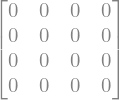

Zdd Tensor $Zdd{^\alpha}{_\beta}$:   0%|          | 0/16 [00:00<?, ?it/s]

Zdd Tensor $Zdd{^\alpha}{^\beta}$:   0%|          | 0/16 [00:00<?, ?it/s]

Zdd Tensor $Zdd{_\alpha}{^\beta}$:   0%|          | 0/16 [00:00<?, ?it/s]

<IPython.core.display.Latex object>

In [35]:
Zdd= pt.ten('Zdd',2)
Zdd.assign(Z*(Ld('_a')*Sd('_b')-Ld('_b')*Sd('_a')) ,"_a,_b")
Zdd.simplify()
Zdd.display('_,_')
Zdd.complete('_,_')
Zdd.simplify()

Elements assigned correctly to the _b,_c,_d components


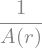

In [36]:
LC = pt.lcivita(convention=1)
eddd= pt.ten('eddd',3)
eddd.assign(LC('_a,_b,_c,_d')*Vu('^a'), "_b,_c,_d")
eddd.simplify()
eddd('_1,_2,_3')

In [37]:
Rdddd= pt.ten('Rdddd',4)
Rdddd.assign(Vd('_c')*Vd('_a')*Ydd('_b,_d')-Vd('_c')*Vd('_b')*Ydd('_a,_d') + \
             Vd('_d')*Vd('_b')*Ydd('_a,_c')-Vd('_d')*Vd('_a')*Ydd('_b,_c') + \
             hdd("_a,_d")*Xdd('_c,_b')- hdd("_a,_c")*Xdd('_d,_b') +\
             hdd("_b,_d")*(X0*hdd("_a,_c")-Xdd('_a,_c') ) + \
             hdd("_b,_c")*(Xdd('_a,_d')-X0*hdd("_a,_d") ) + \
             Vd('_d')*Zdd('^e,_c')*eddd("_a,_b,_e")- Vd('_c')*Zdd('^e,_d')*eddd("_a,_b,_e") + 
             Vd('_b')*Zdd('^e,_a')*eddd("_c,_d,_e")- Vd('_a')*Zdd('^e,_b')*eddd("_c,_d,_e") , "_a,_b,_c,_d")
Rdddd.simplify()
#Rdddd.display('_,_,_,_')
Rdddd.complete('_,_,_,_')

Elements assigned correctly to the _a,_b,_c,_d components


Rdddd Tensor $Rdddd{^\alpha}{_\beta}{_\gamma}{_\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

Rdddd Tensor $Rdddd{^\alpha}{^\beta}{_\gamma}{_\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

Rdddd Tensor $Rdddd{^\alpha}{^\beta}{^\gamma}{_\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

Rdddd Tensor $Rdddd{^\alpha}{^\beta}{^\gamma}{^\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

Rdddd Tensor $Rdddd{^\alpha}{^\beta}{_\gamma}{^\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

Rdddd Tensor $Rdddd{^\alpha}{_\beta}{^\gamma}{_\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

Rdddd Tensor $Rdddd{^\alpha}{_\beta}{^\gamma}{^\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

Rdddd Tensor $Rdddd{^\alpha}{_\beta}{_\gamma}{^\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

Rdddd Tensor $Rdddd{_\alpha}{^\beta}{_\gamma}{_\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

Rdddd Tensor $Rdddd{_\alpha}{^\beta}{^\gamma}{_\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

Rdddd Tensor $Rdddd{_\alpha}{^\beta}{^\gamma}{^\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

Rdddd Tensor $Rdddd{_\alpha}{^\beta}{_\gamma}{^\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

Rdddd Tensor $Rdddd{_\alpha}{_\beta}{^\gamma}{_\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

Rdddd Tensor $Rdddd{_\alpha}{_\beta}{^\gamma}{^\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

Rdddd Tensor $Rdddd{_\alpha}{_\beta}{_\gamma}{^\delta}$:   0%|          | 0/256 [00:00<?, ?it/s]

<IPython.core.display.Latex object>

In [38]:
Rdd= pt.ten('Rdd',2)
Rdd.assign(Y0*Vd('_a')*Vd('_c') - Xdd('_a,_c') + X0*hdd("_a,_c") +\
           Zdd('^d,^b')*eddd("_c,_d,_b")*Vd('_a') + \
           Vd('_c')*Zdd('^d,^b')*eddd("_a,_d,_b"), "_a,_c")
Rdd.complete('_,_')    
Rdd.simplify()
Rdd.display('_,_')

Elements assigned correctly to the _a,_c components


Rdd Tensor $Rdd{^\alpha}{_\beta}$:   0%|          | 0/16 [00:00<?, ?it/s]

Rdd Tensor $Rdd{^\alpha}{^\beta}$:   0%|          | 0/16 [00:00<?, ?it/s]

Rdd Tensor $Rdd{_\alpha}{^\beta}$:   0%|          | 0/16 [00:00<?, ?it/s]

<IPython.core.display.Latex object>

⎡                     2                                                       
⎢4⋅π⋅(3⋅P(r) + ρ(r))⋅A (r)                   0                                
⎢                                                                             
⎢                                                           2                 
⎢                           2⋅(E(r) + 4⋅π⋅Π(r) + 8⋅π⋅ρ(r))⋅B (r)              
⎢            0              ────────────────────────────────────              
⎢                                            3                                
⎢                                                                             
⎢                                                                             
⎢                                                                 (-E(r) - 4⋅π
⎢            0                               0                    ────────────
⎢                                                                             
⎢                                                   

In [39]:
Rs=Rdddd('_a,_b,^a,_d')*g('^b,^d')
Rs.simplify()

8⋅π⋅(-3⋅P(r) + ρ(r))

In [40]:
PI2=pt.ten('PI2',2)
PI2.assign(-1/(8*sy.pi)*(X1+Y1)*(Kd("_a")*Kd("_b")-hdd("_a,_b")/3) ,"_a,_b")
PI2.simplify()
PI2.display('_,_')

Elements assigned correctly to the _a,_b components


⎡0       0             0                 0          ⎤
⎢                                                   ⎥
⎢      2                                            ⎥
⎢   2⋅B (r)⋅Π(r)                                    ⎥
⎢0  ────────────       0                 0          ⎥
⎢        3                                          ⎥
⎢                                                   ⎥
⎢                   2                               ⎥
⎢                 -C (r)⋅Π(r)                       ⎥
⎢0       0        ────────────           0          ⎥
⎢                      3                            ⎥
⎢                                                   ⎥
⎢                                 2            2    ⎥
⎢                               -C (r)⋅Π(r)⋅sin (θ) ⎥
⎢0       0             0        ────────────────────⎥
⎣                                        3          ⎦

## Projections of Riemann tensor

$$
f^{\bullet} = V^{\alpha} \partial_{\alpha}f ; \quad f^{{\rm t}} = K^{\alpha} \partial_{\alpha}f  \quad \mathrm{and} \quad f^{\ast} = L^{\alpha}\partial_{\alpha}f
$$

$$
\sigma^{\bullet}_{1} -a_1^{{\rm t}} -a_1^2+\sigma_1^2 = -\frac{1}{3}(Y_0+2Y_1) \qquad (25)
$$

In [41]:
Dsigma1= pt.ten('Dsigma1',1)
Dsigma1.assign(pt.D(σ1,"_a"), "_a")
Dsigma1.simplify()
Dsigma1P= Vu('^a')*Dsigma1('_a') 
#pt.display(Dsigma1P)
Dsigma1dag= Ku('^a')*Dsigma1('_a') 
#Dsigma1dag
eq25= pt.factor(Dsigma1P - Da1dag - a1**2 + σ1**2) + pt.factor(Y0+2*Y1)/3
eq25

Elements assigned correctly to the _a components


         2                                                                    
        d          d        d                                                 
  B(r)⋅───(A(r)) - ──(A(r))⋅──(B(r))                                          
         2         dr       dr                                                
       dr                              2⋅(E(r) + 6⋅π⋅P(r) - 4⋅π⋅Π(r) + 2⋅π⋅ρ(r
- ────────────────────────────────── + ───────────────────────────────────────
                    3                                      3                  
              A(r)⋅B (r)                                                      

  
  
  
  
))
──
  
  

$$
\sigma^{\bullet}_{2} +\sigma_2^2-a_1J_1 = \frac{1}{3}(Y_1-Y_0) \qquad (26)
$$

In [42]:
Dsigma2= pt.ten('Dsigma2',1)
Dsigma2.assign(pt.D(σ2,"_a"), "_a")
Dsigma2.simplify()
Dsigma2P= Vu('^a')*Dsigma2('_a') 
#pt.display(Dsigma2P)
Dsigma2dag= Ku('^a')*Dsigma2('_a') 
#Dsigma2dag
eq26= pt.factor(Dsigma2P +σ2**2 -a1*J1) - pt.factor((Y1-Y0)/3)
eq26

Elements assigned correctly to the _a components


                                           d        d       
                                           ──(A(r))⋅──(C(r))
  E(r) - 12⋅π⋅P(r) - 4⋅π⋅Π(r) - 4⋅π⋅ρ(r)   dr       dr      
- ────────────────────────────────────── - ─────────────────
                    3                             2         
                                            A(r)⋅B (r)⋅C(r) 

$$
\sigma_2^{{\rm t}}+J_1(\sigma_2-\sigma_1)=-Z \qquad (27)
$$

In [43]:
eq27= pt.simplify(Dsigma2dag + J1*(σ2-σ1)) + Z 
eq27

$$
J^{\bullet}_{1} +J_1\sigma_2-a_1\sigma_2 = -Z \qquad (28)
$$

In [44]:
DJ1= pt.ten('DJ1',1)
DJ1.assign(pt.D(J1,"_a"), "_a")
DJ1.simplify()
DJ1P= Vu('^a')*DJ1('_a') 
#pt.display(DJ1P)
DJ1dag= Ku('^a')*DJ1('_a') 
#DJ1dag
eq28= pt.factor(DJ1P + J1*σ2 - a1*σ2) + Z 
eq28

Elements assigned correctly to the _a components


$$
J_1^{{\rm t}}+J_1^2-\sigma_1 \sigma_2 = \frac{1}{3}(X_1-X_0) \qquad (29)
$$

In [45]:
eq29= pt.factor(DJ1dag + J1**2 - σ2*σ1) - pt.factor((X1-X0)/3)
eq29

       2                                                       
      d          d        d                                    
B(r)⋅───(C(r)) - ──(B(r))⋅──(C(r))                             
       2         dr       dr                                   
     dr                              E(r) + 4⋅π⋅Π(r) + 8⋅π⋅ρ(r)
────────────────────────────────── + ──────────────────────────
             3                                   3             
            B (r)⋅C(r)                                         

$$
J^{\bullet}_{2} +J_2\sigma_2 = 0  \qquad (30)
$$

In [46]:
DJ2= pt.ten('DJ2',1)
DJ2.assign(pt.D(J2,"_a"), "_a")
DJ2.simplify()
DJ2P= Vu('^a')*DJ2('_a') 
#pt.display(DJ2P)
DJ2dag= Ku('^a')*DJ2('_a') 
#DJ2dag
eq30= pt.simplify(DJ2P + J2*σ2) 
eq30

Elements assigned correctly to the _a components


$$
J_2^{{\rm t}} +J_1J_2 = 0   \qquad (31)
$$

In [47]:
eq31= pt.simplify(DJ2dag + J1*J2) 
eq31

$$
J_1^2-\frac{1}{C^2}-\sigma_2^2 = -\frac{1}{3}(X_0+2X_1) \qquad (32)
$$

In [48]:
eq32= pt.simplify(J1**2 - 1/C**2 - σ2**2) + pt.factor((X0+2*X1)/3)
eq32

                    2                                 
   2      ⎛d       ⎞                                  
- B (r) + ⎜──(C(r))⎟                                  
          ⎝dr      ⎠    2⋅(E(r) + 4⋅π⋅Π(r) - 4⋅π⋅ρ(r))
───────────────────── - ──────────────────────────────
      2     2                         3               
     B (r)⋅C (r)                                      

## Equations from Bianchi identities:
$$
\begin{array}{r}
a_1\left[-X_0+X_1-Y_0+Y_1\right]+3 J_1 Y_1+3 Z^{\bullet}+6 Z \sigma_1+3 Z \sigma_2-Y_0^{\dagger}+Y_1^{\dagger}=0 \,\, \text { (33) } \\
X_0^{\bullet}-X_1^{\bullet}-6 a_1 Z-3 J_1 Z+\left[Y_0-Y_1-X_1\right] \sigma_1+\left[Y_0+2 Y_1-X_1\right] \sigma_2+X_0\left[\sigma_1+\sigma_2\right]-3 Z^{\dagger}=0 \,\, \text { (34) } \\
X_0^{\bullet}+2 X_1^{\bullet}+2 X_0 \sigma_2-6 J_1 Z+\left[4 X_1+2 Y_0-2 Y_1\right] \sigma_2=0 \,\, \text { (35) } \\
X_0^{\dagger}+2 X_1^{\dagger}+6 J_1 X_1+6 Z \sigma_2=0 \,\, \text { (36) }
\end{array}
$$

In [49]:
DZ= pt.ten('DZ',1)
DZ.assign(pt.D(Z,"_a"), "_a")
DZ.simplify()
DZP= Vu('^a')*DZ('_a') 
#pt.display(DZP)
DZdag= Ku('^a')*DZ('_a') 
#DZdag

Elements assigned correctly to the _a components


In [50]:
DY0= pt.ten('DY0',1)
DY0.assign(pt.D(Y0,"_a"), "_a")
DY0.simplify()
DY0P= Vu('^a')*DY0('_a') 
#pt.display(DY0P)
DY0dag= Ku('^a')*DY0('_a') 
#DY0dag

Elements assigned correctly to the _a components


In [51]:
DY1= pt.ten('DY1',1)
DY1.assign(pt.D(Y1,"_a"), "_a")
DY1.simplify()
DY1P= Vu('^a')*DY1('_a') 
#pt.display(DY1P)
DY1dag= Ku('^a')*DY1('_a') 
#DY1dag

Elements assigned correctly to the _a components


In [52]:
DX0= pt.ten('DX0',1)
DX0.assign(pt.D(X0,"_a"), "_a")
DX0.simplify()
DX0P= Vu('^a')*DX0('_a') 
#pt.display(DX0P)
DX0dag= Ku('^a')*DX0('_a') 
#DX0dag

Elements assigned correctly to the _a components


In [53]:
DX1= pt.ten('DX1',1)
DX1.assign(pt.D(X1,"_a"), "_a")
DX1.simplify()
DX1P= Vu('^a')*DX1('_a') 
#pt.display(DX1P)
DX1dag= Ku('^a')*DX1('_a') 
#DX1dag

Elements assigned correctly to the _a components


$$
a_1[-X_0+X_1-Y_0+Y_1]+3J_1Y_1+3Z^{\bullet} +6Z \sigma_1 + 3Z\sigma_2-Y_0^\dag+Y_1^\dag = 0  \qquad  (33)
$$

In [54]:
eq33=sy.factor(a1*(-X0+X1-Y0+Y1) + 3*J1*Y1 + 3*DZP + 6*Z*σ1 + 3*Z*σ2 - DY0dag + DY1dag )
eq33

          d                         d                        d                
A(r)⋅C(r)⋅──(E(r)) - 12⋅π⋅A(r)⋅C(r)⋅──(P(r)) - 4⋅π⋅A(r)⋅C(r)⋅──(Π(r)) - 4⋅π⋅A(
          dr                        dr                       dr               
──────────────────────────────────────────────────────────────────────────────
                                                                              

        d                      d                         d                    
r)⋅C(r)⋅──(ρ(r)) + 3⋅A(r)⋅E(r)⋅──(C(r)) - 12⋅π⋅A(r)⋅Π(r)⋅──(C(r)) - 12⋅π⋅C(r)⋅
        dr                     dr                        dr                   
──────────────────────────────────────────────────────────────────────────────
                         A(r)⋅B(r)⋅C(r)                                       

     d                        d                         d       
P(r)⋅──(A(r)) - 8⋅π⋅C(r)⋅Π(r)⋅──(A(r)) - 12⋅π⋅C(r)⋅ρ(r)⋅──(A(r))
     dr                       dr                        dr      
─────────────

$$
X^{\bullet}_0 -X^{\bullet}_1 -6a_1Z -3J_1Z  +\left[Y_0 -Y_1 -X_1\right] \sigma_1  +\left[Y_0 +2Y_1 -X_1\right] \sigma_2   +X_0[\sigma_1+\sigma_2]-3Z^\dag = 0 \qquad (34)
$$

In [55]:
eq34=sy.simplify(DX0P-DX1P -6*a1*Z - 3*J1*Z + (Y0-Y1-X1)*σ1 + (Y0+2*Y1-X1)*σ2 +X0*(σ1+σ2)-3*DZdag )
eq34

$$
X^{\bullet}_0 +2 X^{\bullet}_1 +2X_0\sigma_2 -6J_1Z +[4X_1 + 2Y_0 - 2Y_1] \sigma_2 =0 \qquad (35)
$$

In [56]:
eq35=sy.simplify(DX0P+2*DX1P + 2*X0*σ2 - 6*J1*Z + (4*X1+2*Y0-2*Y1)*σ2)
eq35

$$
X_0^\dag+2X_1^\dag+6J_1X_1+6Z\sigma_2= 0 \qquad (36)
$$

In [57]:
eq36=sy.factor(DX0dag + 2*DX1dag + 6*J1*X1 + 6*Z*σ2  )
eq36

   ⎛     d                   d                   d                 d          
-2⋅⎜C(r)⋅──(E(r)) + 4⋅π⋅C(r)⋅──(Π(r)) - 4⋅π⋅C(r)⋅──(ρ(r)) + 3⋅E(r)⋅──(C(r)) + 
   ⎝     dr                  dr                  dr                dr         
──────────────────────────────────────────────────────────────────────────────
                                            B(r)⋅C(r)                         

          d       ⎞ 
12⋅π⋅Π(r)⋅──(C(r))⎟ 
          dr      ⎠ 
────────────────────
                    

## Non-Pascalian static fluids

$$
4\pi(\rho+3P) = a^{\alpha}_{;\alpha} \qquad (37)
$$

In [58]:
eq37 = Dcad('^a,_a') - 4*sy.pi*(T("_a,_b")*Vu('^a')*Vu('^b')+ 3*(hdd("^a,^b")*T("_a,_b")/3) )
eq37

                                   2                                          
                                  d               d        d               ⎛d 
                       A(r)⋅B(r)⋅───(A(r)) - A(r)⋅──(A(r))⋅──(B(r)) - B(r)⋅⎜──
                                   2              dr       dr              ⎝dr
                                 dr                                           
-4⋅π⋅(3⋅P(r) + ρ(r)) + ───────────────────────────────────────────────────────
                                                  2     3                     
                                                 A (r)⋅B (r)                  

       2                                    
      ⎞                                    2
(A(r))⎟      d        d          ⎛d       ⎞ 
      ⎠    2⋅──(A(r))⋅──(C(r))   ⎜──(A(r))⎟ 
             dr       dr         ⎝dr      ⎠ 
──────── + ─────────────────── + ───────────
                   2              2     2   
             A(r)⋅B (r)⋅C(r)     A (r)⋅B (r)

$$
E_{\alpha\beta} = \mathcal{E}\left[K_\alpha K_\beta-\frac{1}{3} h_{\alpha\beta}\right] \qquad (22)
$$

Elements assigned correctly to the _a,_b components


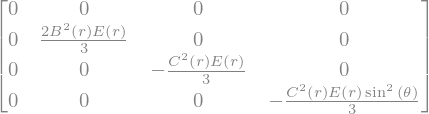

In [59]:
Edd=pt.ten('Edd',2)
Edd.assign( E*(Kd('_a')*Kd('_b')-hdd('_a,_b')/3)  ,'_a,_b')
Edd.simplify()
Edd.display('_,_')

$$
  E_{\alpha \beta}-4\pi \Pi_{\alpha\beta} = a_\alpha a_\beta+h^\mu _{(\alpha}h^\nu_{\beta)}a_{\nu;\mu}-\frac{1}{3}a^\delta_{;\delta}h_{\alpha\beta} \qquad (38)
$$

In [60]:
E38dd= pt.ten('E38dd',2)
E38dd.assign(Edd('_a,_b')-4*sy.pi*PIT('_a,_b') - (ad('_a')*ad('_b') + (hdd('_a,^c')*hdd('_b,^d')+hdd('_b,^c')*hdd('_a,^d'))*Dcad('_d,_c')/2 \
     - Dcau('^c,_c')*hdd('_a,_b')/3) ,'_a,_b')
E38dd.complete('_,_')    
E38dd.simplify()
E38dd.display('_,_')

Elements assigned correctly to the _a,_b components


E38dd Tensor $E38dd{^\alpha}{_\beta}$:   0%|          | 0/16 [00:00<?, ?it/s]

E38dd Tensor $E38dd{^\alpha}{^\beta}$:   0%|          | 0/16 [00:00<?, ?it/s]

E38dd Tensor $E38dd{_\alpha}{^\beta}$:   0%|          | 0/16 [00:00<?, ?it/s]

<IPython.core.display.Latex object>

⎡0                                                                            
⎢                                                                             
⎢                                     ⎛                                       
⎢                                     ⎜⎛   2       ⎞           d        d     
⎢                                     ⎜⎝sin (θ) + 1⎠⋅A(r)⋅C(r)⋅──(A(r))⋅──(C(r
⎢                        2     3      ⎜                        dr       dr    
⎢   (2⋅E(r) - 8⋅π⋅Π(r))⋅A (r)⋅B (r)   ⎝                                       
⎢   ─────────────────────────────── + ────────────────────────────────────────
⎢                  3                                                          
⎢                                                                             
⎢0  ──────────────────────────────────────────────────────────────────────────
⎢                                                                             
⎢                                                   

$$
\quad X_{\alpha\beta} = \epsilon _\alpha^{\,\,\,\mu\nu}\left (\epsilon _{\beta}^{\,\,\delta}J^{(k)}_{\delta\mu;\nu}-K_\beta S^\delta J^{(l)}_{\delta\mu;\nu}\right ) \qquad (39)
$$